In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

data = pd.read_csv('dataset/California Housing Dataset.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 1. Data Inspection

In [35]:
data.info()

# total_bedrooms has null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [36]:
data['ocean_proximity'].value_counts()

# Majority of the houses are just 1 hour away from the ocean

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [37]:
data.describe()

# Most houses are 28 years old

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2. Data Visualization

### See distribution of each feature

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

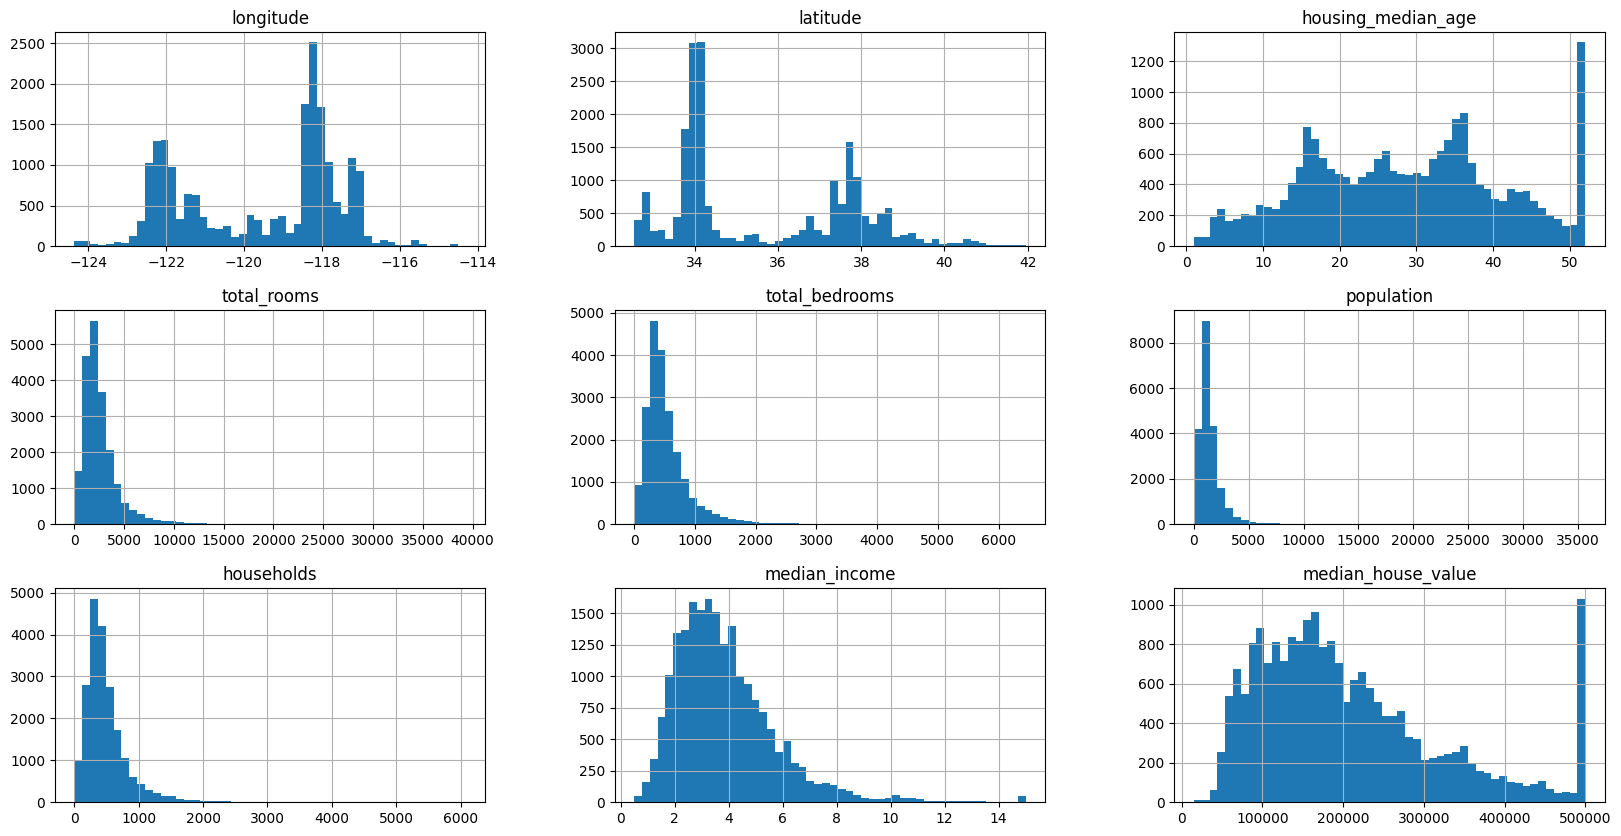

In [38]:
visual = data.hist(bins=50, figsize=(20,10))
visual

# housing median age outliers of the 50 year mark
# total_rooms, total_bedrooms, population, households, and median_income skewed to the right

### Normality test of "median_income"

<AxesSubplot:xlabel='median_income', ylabel='Count'>

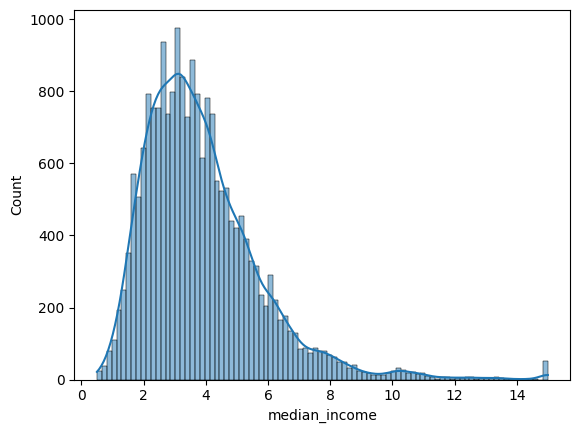

In [39]:
sns.histplot(data['median_income'], kde=True)

# In this case, we assume that the feature 'median_income' is relevant
# We plotted it into a histogram to see the distribution

In [40]:
data['median_income'].agg(['skew', 'kurtosis']).transpose()

# --- Skew insight
# right-skewed distribution, tail on the right side is longer
# >1 means it is highly skewed to the right
# many small values with some large values as outliers

# --- Kurtosis insight
# normal distribution has kurtosis of 3 (mesokurtic)
# however, median_income is leptokurtic (heavier tails, more extreme outliers)

# --- Conclusion
# this can be bad for regression and t-test as it assumes normality

skew        1.646657
kurtosis    4.952524
Name: median_income, dtype: float64

# Data Preprocessing

## Convert "median_income" to "Income_categories"

In [41]:
data['Income_categories'] = pd.cut(data['median_income'], 
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                   labels=[1, 2, 3, 4, 5])
data['Income_categories'].head()

0    5
1    5
2    5
3    4
4    3
Name: Income_categories, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [42]:
data['Income_categories'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: Income_categories, dtype: int64

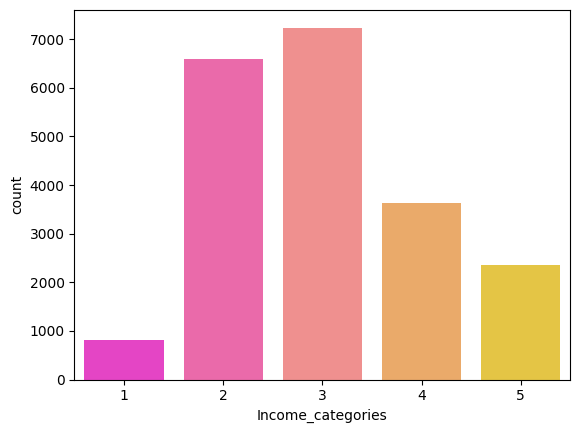

In [43]:
sns.countplot(x='Income_categories', data=data, palette='spring')
plt.show()

# Category 3 as the most dominant Income Category

# 3. Data Test

- In this test, we are trying to prove that splitting the data based on equal income categories on both train and test is the best representation for the full data.

### Train / Test Split

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### Stratified Shuffle Split

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Income_categories']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

## Stratified vs. Train / Test vs. Overall

In [46]:
stratified = strat_test_set['Income_categories'].value_counts() / len(strat_test_set)
stratified

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: Income_categories, dtype: float64

In [47]:
Overall = data['Income_categories'].value_counts() / len(data)
Overall

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: Income_categories, dtype: float64

In [48]:
Random = test_set['Income_categories'].value_counts() / len(test_set)
Random

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: Income_categories, dtype: float64

In [49]:
Comparison = pd.DataFrame({'Overall' : Overall, 'Stratified' : stratified, 'Random': Random}).sort_index()
Comparison['Stratified % Error'] = (100*Comparison['Stratified'] / Comparison['Overall']) - 100
Comparison['Random % Error'] = (100*Comparison['Random'] / Comparison['Overall']) - 100
Comparison.reset_index()

,index,Overall,Stratified,Random,Stratified % Error,Random % Error
0,1,0.039826,0.039971,0.040213,0.364964,0.973236
1,2,0.318847,0.318798,0.324370,-0.015195,1.732260
2,3,0.350581,0.350533,0.358527,-0.013820,2.266446
3,4,0.176308,0.176357,0.167393,0.027480,-5.056334
4,5,0.114438,0.114341,0.109496,-0.084674,-4.318374


Notice that when we use stratified split, the division of median_income values is almost the same with the overall data. We want to split the dataset in a way that median_income values are equally divided. Thus, we will use the Stratified Shuffle Split data.

In [50]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Income_categories", axis=1, inplace=True)

# 4. Correlation

In [51]:
strat_train_set_num = strat_train_set.copy().select_dtypes(include=['float', 'int'])
corr_matrix = strat_train_set_num.corr()
Strat_train_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
Strat_train_corr

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:>

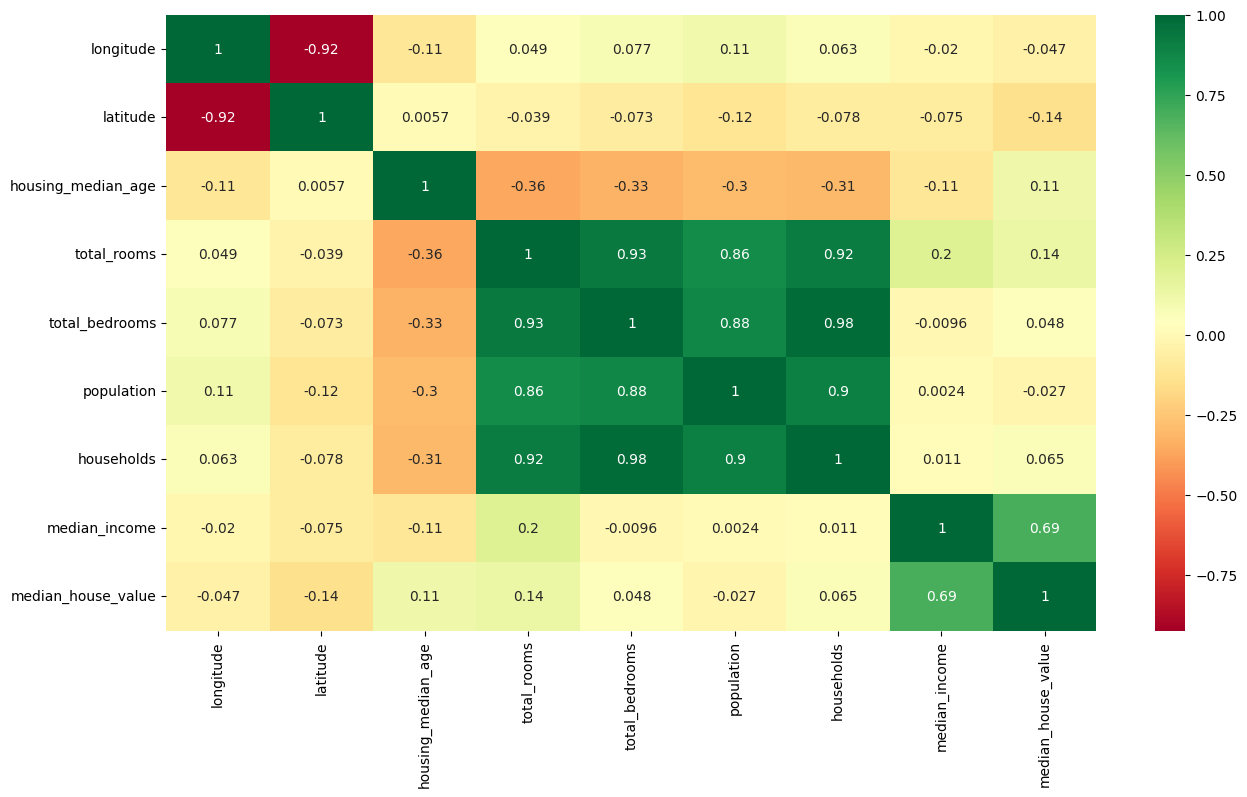

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(strat_train_set_num.corr(),annot=True,cmap="RdYlGn")

We select features with relatively decent correlation with our label (median_house_value). This features are median_income, total_rooms, and housing_median_age

# 5. Get continuous features

In [53]:
strat_train_set_num = strat_train_set.select_dtypes(include = ['int', 'float64'])
strat_train_set_num = strat_train_set_num.drop('median_house_value', axis=1)
strat_train_set_num.columns # to select median_income, total_rooms, and housing_median_age

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## 5.1 Data Imputation

- We use .fit() for our imputer to learn the parameters of the strat_train_set_num -> so that we can save our imputer as a model. Moreover, we use tranform() to "impute" our strat_train_set_num -> used to apply learned parameters on unseen data (data not in training data). We use fit_transform() during training to save a step (it's the same as using fit() and transform() separately)

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [55]:
imputer.fit(strat_train_set_num)

SimpleImputer(strategy='median')

In [56]:
strat_train_set_imputed = imputer.transform(strat_train_set_num)
strat_train_set_imputed

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [57]:
imputer.statistics_ # median of each column

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [58]:
import pickle as pkl
import os

with open(os.path.join("models", "num_features_imputer.pkl"), 'wb') as f:
    pkl.dump(imputer, f)

In [59]:
strat_train_set_imputed = pd.DataFrame(strat_train_set_imputed, 
                  columns = list(strat_train_set_num.columns), 
                  index = list(strat_train_set_num.index))

strat_train_set_imputed.info() # 8 numerical features + 1 numerical label ("median_house_value")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## 5.2 Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [61]:
std_scaler.fit(strat_train_set_imputed)

StandardScaler()

In [62]:
strat_train_set_imputed_scaled = std_scaler.fit_transform(strat_train_set_imputed)
strat_train_set_imputed_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [63]:
import pickle as pkl
import os

with open(os.path.join("models", "num_features_scaler.pkl"), 'wb') as f:
    pkl.dump(std_scaler, f)

# 6. Get categorical features

In [64]:
strat_train_cat = strat_train_set.copy().select_dtypes(include=['O'])
strat_train_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


## 6.1 Feature Encoding

In [65]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [66]:
ordinal_encoder.fit(strat_train_cat)

OrdinalEncoder()

In [67]:
strat_train_cat_ordinal_encoded = ordinal_encoder.fit_transform(strat_train_cat)
strat_train_cat_ordinal_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [68]:
import pickle as pkl
import os

with open(os.path.join("models", "ordinal_encoder.pkl"), 'wb') as f:
    pkl.dump(ordinal_encoder, f)

In [69]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [70]:
strat_train_cat_onehot_encoded = onehot_encoder.fit_transform(strat_train_cat)
strat_train_cat_onehot_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 7. Concat continuous and categorical features

## 7.1 on Ordinal Encoded

In [71]:
final_train_ordinal = np.concatenate((strat_train_set_imputed_scaled, strat_train_cat_ordinal_encoded), axis=1)
final_train_ordinal

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.55628602,
        -0.8936472 ,  1.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.72131799,
         1.292168  ,  4.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52440722,
        -0.52543365,  1.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86511838,
        -0.36547546,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.01061579,
         0.16826095,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.79857323,
        -0.390569  ,  1.        ]])

In [72]:
final_train_ordinal.shape # 8 numerical features + 
                          # 1 numerical label + 
                          # 1 categorical features (ordinal encoded)

(16512, 9)

## 7.2 on OneHot Encoded

In [73]:
final_train_onehot = np.concatenate((strat_train_set_imputed_scaled, strat_train_cat_onehot_encoded.toarray()), 
                                    axis=1)
final_train_onehot

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
final_train_onehot.shape # 8 numerical features +
                         # 1 numerical label +
                         # 1 categorical feature (one-hot encoded so it corresponds to 5 columns)

(16512, 13)

In [75]:
final_train_labels = strat_train_set.median_house_value.copy()
final_train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [76]:
final_train_labels.shape

(16512,)

# 8. Model Training

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

### .fit()

In [78]:
lin_reg.fit(final_train_ordinal, final_train_labels)

LinearRegression()

### .predict()

In [79]:
y_hat = lin_reg.predict(final_train_ordinal)
y_hat

array([ 95506.54304879, 293131.30910549, 176504.67019204, ...,
       212483.12004643, 231561.70991248,  93751.73682221])

### Evaluation Metrics - RMSE & MAE

In [80]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(final_train_labels, y_hat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69957.31159823203

In [81]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(final_train_labels, y_hat)
lin_mae

50972.40125162178

### Cross Validation - cross_val_score()

In [82]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, final_train_ordinal, final_train_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([73045.72331495, 66347.94516911, 68567.26786067, 70105.76844784,
       67692.1343885 , 73757.82907155, 72083.1752024 , 70311.44913865,
       67731.71715341, 71373.97679319])

In [83]:
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Mean: 70101.69865402688
Standard deviation: 2355.6629424914795


## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_reg = DecisionTreeRegressor(random_state=45)

### .fit()

In [85]:
DecisionTree_reg.fit(final_train_ordinal, final_train_labels)

DecisionTreeRegressor(random_state=45)

### .predict()

In [86]:
y_hat_DecisionTree = DecisionTree_reg.predict(final_train_ordinal)
y_hat_DecisionTree

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

### Evaluation Metrics - RSME

In [87]:
DecisionTree_reg_mse = mean_squared_error(final_train_labels, y_hat_DecisionTree)
DecisionTree_reg_rmse = np.sqrt(DecisionTree_reg_mse)
DecisionTree_reg_rmse

0.0

### Cross Validation - cross_val_score()

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTree_reg, final_train_ordinal, final_train_labels, 
                         scoring="neg_mean_squared_error", cv=10)
DecisionTree_reg_rmse_scores = np.sqrt(-scores)
DecisionTree_reg_rmse_scores

array([70095.82167048, 70772.32808663, 66312.08805495, 71016.56101148,
       66318.85022746, 70622.40683549, 75134.83337705, 68439.86096409,
       67895.98805065, 70040.13644205])

In [89]:
print("Mean:", DecisionTree_reg_rmse_scores.mean())
print("Standard deviation:", DecisionTree_reg_rmse_scores.std())

Mean: 69664.88747203352
Standard deviation: 2475.56130931178


## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(n_estimators=100, random_state=45)

### .fit()

In [91]:
RandomForest_reg.fit(final_train_ordinal, final_train_labels)

RandomForestRegressor(random_state=45)

### .predict()

In [92]:
predictions_RandomForest_reg = RandomForest_reg.predict(final_train_ordinal)
predictions_RandomForest_reg

array([ 75879.  , 308883.01,  78041.  , ..., 156934.  , 240670.  ,
        77499.  ])

### Evaluation Metrics - RSME and MAE

In [93]:
RandomForest_reg_rmse = mean_squared_error(final_train_labels, predictions_RandomForest_reg, squared=False)
RandomForest_reg_rmse

18631.13858871076

In [94]:
RandomForest_reg_mae = mean_absolute_error(final_train_labels, predictions_RandomForest_reg)
RandomForest_reg_mae

11999.804146075581

In [95]:
from sklearn.model_selection import cross_val_score

RandFor_scores = cross_val_score(RandomForest_reg, final_train_ordinal, final_train_labels, 
                                 scoring="neg_mean_squared_error", cv=10)
RandFor_rmse_scores = np.sqrt(-RandFor_scores)
RandFor_rmse_scores

array([51528.88175151, 48767.58921977, 47285.41970338, 51623.29867345,
       47992.11929947, 50997.00403775, 52993.94827694, 49685.66580618,
       47937.84058583, 53390.63632327])

In [96]:
print("Mean:", RandFor_rmse_scores.mean())
print("Standard deviation:", RandFor_rmse_scores.std())

Mean: 50220.240367754224
Standard deviation: 2078.758106919943


## SVR

In [97]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")

### .fit()

In [98]:
svm_reg.fit(final_train_ordinal, final_train_labels)

SVR(kernel='linear')

### .predict()

In [99]:
predictions_svm_reg = svm_reg.predict(final_train_ordinal)
predictions_svm_reg

array([172782.12053534, 195373.0803988 , 176174.24898688, ...,
       174651.31457115, 178861.15592373, 171511.46535084])

In [100]:
svm_rmse = mean_squared_error(final_train_labels, predictions_svm_reg, squared=False)
svm_rmse

112499.73102248111

In [101]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_reg, final_train_ordinal, final_train_labels, 
                             scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
svm_rmse_scores

array([111726.24983698, 114373.560143  , 108334.18856491, 114792.73717501,
       109139.3093245 , 117235.55468043, 114498.31994349, 113112.12017499,
       114463.59004667, 113293.63134089])

In [102]:
print("Mean:", svm_rmse_scores.mean())
print("Standard deviation:", svm_rmse_scores.std())

Mean: 113096.92612308581
Standard deviation: 2563.7778346792807


# 9. Hyperparameter Tuning

### GridSearch

#### parameter grid

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

#### .fit()

In [104]:
forest_reg = RandomForestRegressor(random_state=45)

# train across 5 folds, that's a total of (12+6)*5 = 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(final_train_ordinal, final_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### best_params_

Using GridSearch, we are able to find the best hyperparameter (n_estimators, max_features) values

In [105]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

#### best_estimator_

In [106]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=45)

#### cv_results_

In [107]:
best = grid_search.cv_results_
mean_score = max(best['mean_test_score'])
np.sqrt(-mean_score)

50064.51755639091

#### feature_importances_

In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13233983, 0.12748138, 0.05271884, 0.03667127, 0.03102891,
       0.04389813, 0.02921951, 0.44324385, 0.10339828])

### RandomSearch

#### parameter distribs

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

#### .fit()

In [110]:
forest_reg = RandomForestRegressor(random_state=45)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=45)
rnd_search.fit(final_train_ordinal, final_train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BD3F8803C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BD3F880648>},
                   random_state=45, scoring='neg_mean_squared_error')

#### best_params_

In [111]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 159}

#### best_estimator_

In [112]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=159, random_state=45)

#### cv_results_

In [113]:
best_rnd = rnd_search.cv_results_
mean_score_rnd = max(best_rnd['mean_test_score'])
np.sqrt(-mean_score_rnd)

48921.84141489697

#### best_score_

In [114]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

48921.84141489697

Random search is better than GridSearch. Thus we will use this as our final Random Forest Model

#### feature_importances_

In [115]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.1414434 , 0.13288123, 0.0507606 , 0.03644343, 0.03021609,
       0.04333436, 0.02909915, 0.43920831, 0.09661342])

In [116]:
X_test = strat_test_set.copy().drop("median_house_value", axis=1)
X_test_num = X_test.copy().select_dtypes(include=['float64'])
X_test_cat = X_test.copy().select_dtypes(include=['O'])
y_test = strat_test_set["median_house_value"].copy()

In [117]:
index = np.argpartition(np.array(feature_importances), -9)[-9:]

relevant_features = []
for i,j in zip(feature_importances, list(np.array(X_test.columns)[index])):
    k = [i,j]
    relevant_features.append(k)
X_test_features = sorted(relevant_features, reverse=True)[:4]

X_test_features_final = []
for feature in X_test_features:
    x = feature[1]
    X_test_features_final.append(x)
X_test_features_final

['median_income', 'households', 'latitude', 'ocean_proximity']

In [118]:
X_test.columns # only 4 remains

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# 10. Model Evaluation

## 10.1 Data Preprocessing

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline([
                    ('imputer', SimpleImputer(strategy="median")),
                    ('std_scaler', StandardScaler()),
                    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(X_test_num.columns)),
        ("cat", OrdinalEncoder(), list(X_test_cat.columns)),
    ])

In [120]:
preprocessed_X_test = full_pipeline.fit_transform(X_test)
preprocessed_X_test

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  1.10480288,
         2.35845461,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ..., -0.55602421,
         0.61735909,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ..., -0.57564994,
         0.28422164,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ..., -0.37203303,
         0.45244009,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ..., -0.23955937,
         0.56552588,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ..., -0.20521435,
         0.13904609,  0.        ]])

In [121]:
preprocessed_X_test.shape # because we used the Ordinal Encoder in the pipeline

(4128, 9)

## 10.2 Prediction on test data

In [122]:
final_model = rnd_search.best_estimator_ # Random Forest

predictions = final_model.predict(preprocessed_X_test)
predictions

array([476555.41509434, 198073.60377358, 216409.45283019, ...,
       351532.88050314, 259917.62264151, 223511.94968553])

## 10.3 RSME

In [123]:
final_test_rmse = mean_squared_error(y_test, predictions, squared=False)
final_test_rmse

51046.213280852426

# 11. Confidence Interval

- We perform a statistical test to determine the range of our error scores

## t-test

In [124]:
from scipy import stats

confidence = 0.95
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([49191.14439956, 52836.19113156])

With 95% confidence, the true rmse is between this interval

## z-test

In [125]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(49191.14439955815, 52836.19113155648)

With 95% confidence, the true rmse is between this interval

# 10. Model Selection

## Save model

In [126]:
import pickle as pkl
import os

with open(os.path.join("models", "California_Housing_Price_Predictor.pkl"), 'wb') as f:
    pkl.dump(final_model, f)

## Import model

In [127]:
import os
import pickle as pkl

with open(os.path.join("models", "California_Housing_Price_Predictor.pkl"), 'rb') as file:
    model = pkl.load(file)

with open(os.path.join("models", "num_features_imputer.pkl"), 'rb') as file:
    imputer = pkl.load(file)

with open(os.path.join("models", "num_features_scaler.pkl"), 'rb') as file:
    std_scaler = pkl.load(file)

with open(os.path.join("models", "ordinal_encoder.pkl"), 'rb') as file:
    ordinal_encoder = pkl.load(file)

## Test model

In [30]:
columns = ["longitude",
           "latitude",
           "housing_median_age",
           "total_rooms",
           "total_bedrooms",
           "population",
           "households",
           "median_income",
           "ocean_proximity"
           ]

values = [float(input(f"{col}: "))for col in columns[:8]]

ocean_proximity = input(f"{columns[-1]}: ")
values.append(ocean_proximity)

values

[-118.7, 34.12, 24.0, 2020.0, 1456.0, 267.0, 301.0, 3.245, 'NEAR OCEAN']

In [128]:
import pandas as pd

prototype_values = pd.DataFrame(values, 
                                index = columns).transpose()
prototype_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.7,34.12,24.0,2020.0,1456.0,267.0,301.0,3.245,NEAR OCEAN


### Impute

In [129]:
prototype_values[columns[:8]] = imputer.transform(prototype_values[columns[:8]])
prototype_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.7,34.12,24.0,2020.0,1456.0,267.0,301.0,3.245,NEAR OCEAN


### Scale

In [130]:
prototype_values[columns[:8]] = std_scaler.transform(prototype_values[columns[:8]])
prototype_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.437431,-0.710658,-0.370069,-0.281778,2.244582,-1.033217,-0.521745,-0.331195,NEAR OCEAN


### Encode

In [131]:
prototype_values["ocean_proximity"] = ordinal_encoder.transform(prototype_values[["ocean_proximity"]])
prototype_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.437431,-0.710658,-0.370069,-0.281778,2.244582,-1.033217,-0.521745,-0.331195,4.0


### Predict

In [132]:
prediction = model.predict(prototype_values)
print(f"Median House Value: {prediction}")

Median House Value: [309116.48427673]
